In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Epidemic model with graph

In [2]:
class EpidemicParameters:
    def __init__(self, recovery_proba, infection_rate, initial_infection_proba):
        self.recovery_proba = recovery_proba # Each time step, an infected recovers with this probability
        self.infection_rate = infection_rate # Each time step, a susceptible infects each neighbor with this proba
        self.initial_infection_proba = initial_infection_proba # Initial proba of being infected

In [12]:
SUSCEPTIBLE = 0
INFECTED    = 1
RECOVERED   = 2

def epidemic(graph, params, time_simulation=1e9):
    """
    Simulate an epidemic model on a "graph"
    """
    n = len(graph.nodes)
    p = params.initial_infection_proba
    state = np.random.choice([SUSCEPTIBLE,INFECTED],size=n,p=[1-p,p],replace=True) 
    # state[i] \in {0 (suscetible), 1 (infected), 2 (recovered)}
    number_of_infected = np.sum(state == INFECTED)
    number_of_recovered = np.sum(state == RECOVERED)
    infected = []
    recovered = []
    t=0
    while number_of_infected>0 and t < time_simulation:
        node = np.random.randint(n)
        if state[node] == INFECTED:
            for j in graph[node]:
                if state[j] == SUSCEPTIBLE and np.random.rand() <= params.infection_rate:
                    state[j] = INFECTED
                    number_of_infected+=1
            if np.random.rand() <= params.recovery_proba:
                state[node] = RECOVERED
                number_of_infected -= 1
                number_of_recovered += 1
        infected.append(number_of_infected)
        recovered.append(number_of_recovered)
        t+=1
    infected = np.array(infected)
    recovered = np.array(recovered)
    return n-infected-recovered, infected, recovered

In [13]:
def epidemic_simu(graph, R0, average_infection_time=2):
    """
    computes the infection rate as a function of RO (= average number of infected people)
    """
    average_degree = np.mean(graph.degree,0)[1]
    params = EpidemicParameters(1/average_infection_time,R0/(average_infection_time*average_degree),.01)
    return epidemic(graph, params)
def epidemic_plotSimu(graph, R0, average_infection_time=2):
    S,I,R = epidemic_simu(graph, R0, average_infection_time)
    plt.figure()
    plt.plot(S, label='Susceptible')
    plt.plot(I, label='Infected')
    plt.plot(R, label='Recovered')
    plt.legend()
    n = (S+I+R)[0]
    plt.title('Max % of infected {}, Final % of case={}'.format(100*max(I)/n,100*R[-1]/n))

# Complete graph

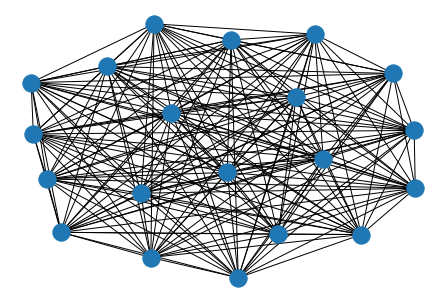

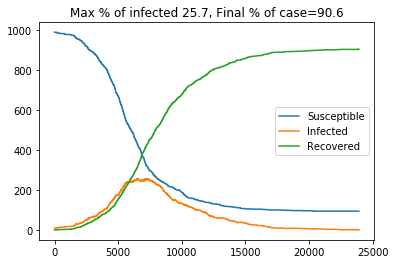

In [14]:
n=1000
nx.draw(nx.complete_graph(20))
epidemic_plotSimu(nx.complete_graph(n),2.4)

# Erdos Renyi

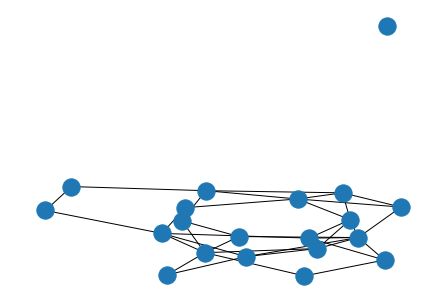

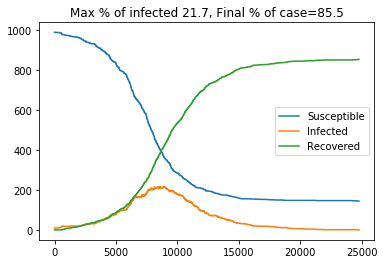

In [15]:
n=1000
nx.draw(nx.erdos_renyi_graph(20,3/20))
epidemic_plotSimu(nx.erdos_renyi_graph(n,50/n),2.4)

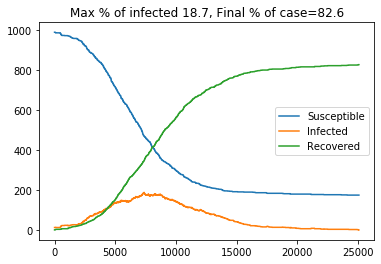

In [16]:
epidemic_plotSimu(nx.erdos_renyi_graph(n,10/n),2.4)

# Watts-Strogatz (circular model + random rerouted edges)

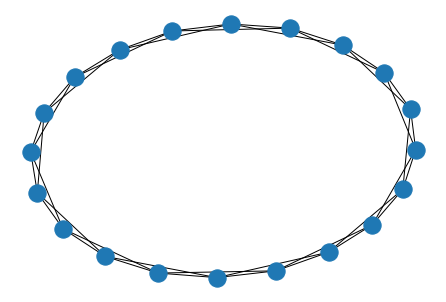

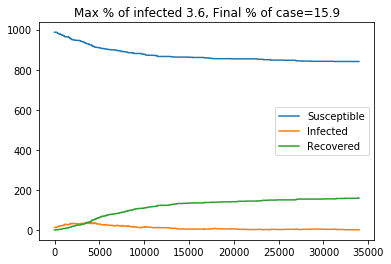

In [17]:
nx.draw(nx.watts_strogatz_graph(20,5,p=0))
epidemic_plotSimu(nx.watts_strogatz_graph(n,4,0),2.4)

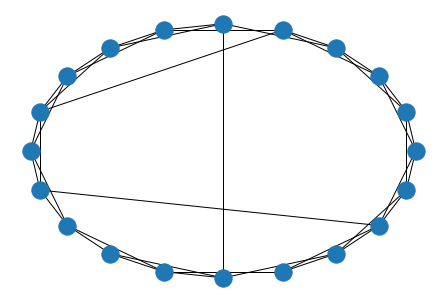

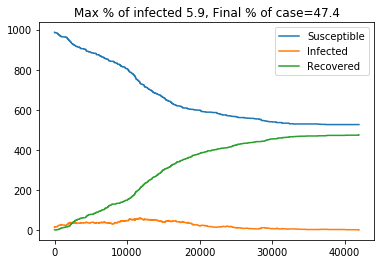

In [18]:
nx.draw_circular(nx.watts_strogatz_graph(20,5,p=0.1))
epidemic_plotSimu(nx.watts_strogatz_graph(n,5,0.1),2.4)

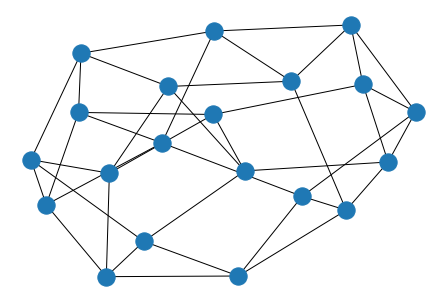

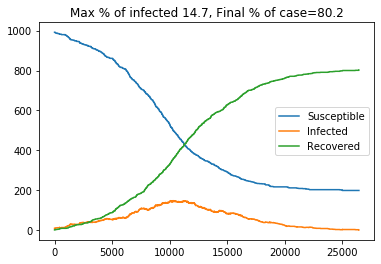

In [19]:
nx.draw(nx.random_regular_graph(4,20))
epidemic_plotSimu(nx.random_regular_graph(5,n,5),2.4)

# Barabasi-Albert

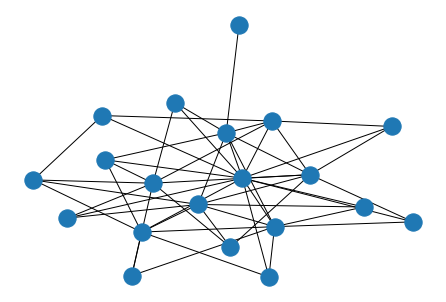

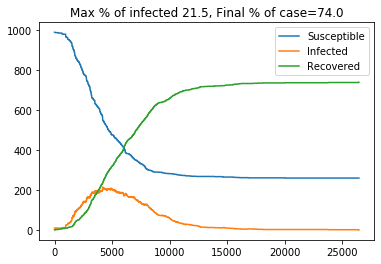

In [20]:
nx.draw(nx.barabasi_albert_graph(20,3))
epidemic_plotSimu(nx.barabasi_albert_graph(n,3),2.4)